## 회귀
- 가장 중요한 것은 "회귀 계수"!! 우리는 항상 잔차(Residual)가 최소화될때의 회귀계수(w0, w1, w2, ...)를 구하는 것이 목표.
- 1) 선형 회귀 -그중 다항 회귀--(2)
- 2) 독립변수의 수에 따라 단순회귀, 다중회귀--(1)
- 3) 회귀계수에 과적합 방지하기 위한 '규제'(regulization)를 걸 수 있음.--(3)

###### 최적의 회귀 모델이다 = 잔차합(RSS)을 최소화한다 = 과적합 될 가능성이 높다.
###### 최적의 회귀 모델로 만들어졌는지 평가: (실제값 - 예측값)들의 합 --절댓값 합 평균(MAE),제곱합 평균(MSE),제곱합(RSS) -보통은 RSS/MSE를 사용
##### ----------------------------------------------

### 1. 선형 회귀(LinearRegression) with 경사하강법
##### 독립변수 수가 1개인 단순회귀, 여러개인 다중회귀 둘 다 다룰 것이지만, 경사하강법은 직접 코딩을 해야 하므로 단순회귀에 대해서만 사용.
- Y_hat=w1*X+w0
- RSS는 변수가 w0, w1인 식으로 표현할 수 있음 ((Y-Y_hat)들의 제곱 합) :여기서 주의할 점은 w0, w1이 중심 변수라는 것.
- RSS 식을 w0, w1에 대해 편미분하여 w0, w1값을 가져올 수 있음. 근데 이때 경사하강법을 이용해서(RSS를 최소로 해야하니까) w0= 이전w0-w0_update, w1= 이전w1-w1_update로 업데이트해나감.
- 여기서 RSS=비용함수=손실함수=Cost Function

In [1]:
#경사하강법
#간단한 회귀식인 y=4x+6을 근사하기 위한 100개의 데이터셋을 만들고, 경사하강법을 이용해 w0, w1의 값을 알아보자.(w0=6, w1=4가 나올까?)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- np.random 정리: https://nittaku.tistory.com/443

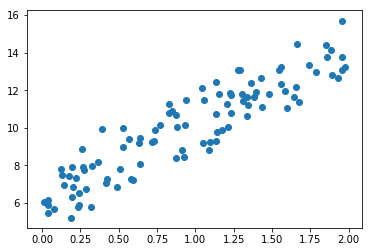

In [2]:
np.random.seed(0)

X=2*np.random.rand(100,1) #0~1 사이 uniform dist'n ->100x1 개
y=6+4*X+np.random.randn(100,1) #가우시안 표준 정규분포 N(0,1) ->100x1 개

plt.scatter(X,y)
#y=4x+6 선을 기준으로 퍼져 있음.

- 여기서 회귀분석을 실시하여 회귀계수(w0, w1) 을 구할 것임. 우선은 계속 업데이트할 값인 w1_update, w0_update 반환

In [3]:
y_pred=np.dot(X, 6) + 4
len(y)

100

In [15]:
np.zeros((1,1)) #type이 array

array([[0.]])

In [4]:
#w1과 w를 업데이트할 w1_update, w0_update 반환

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y) #100
    w1_update=np.zeros_like(w1) #w1, w0_update는 모두 초기화
    w0_update=np.zeros_like(w0)
    
    y_pred=np.dot(X, w1.T) + w0 #y_hat을 의미
    diff=y-y_pred #diff = 실제값-예측값(y-y_hat), 이 diff를 w1_,w0_update에 사용.
    
    w0_factors=np.ones((N,1)) #연산을 위해 만든 모두 1인 행렬임
    w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update #이렇게 만든 w1_update, w0_update를 빼는 것을 for loop를 돌려서 계속 w1, w0값을 업데이트 할 것임.(update 값이 0이 될 떄까지!-iters 횟수 지정)


In [5]:
#경사하강법 실시- w0, w1 반환

def gradient_descent_steps(X,y,iters=10000):
    #w0, w1을 0으로 만듦
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1= w1-w1_update #w1은 0이었다가 업데이트 값에 의해 값이 바뀜-for loop에 의해 계속 바뀜(iters 끝날때까지)
        w0= w0-w0_update #w0도 0이었다가 업데이트 값에 의해 값이 바뀜-for loop에 의해 계속 바뀜(iters 끝날때까지)
        
    return w1, w0

In [6]:
#예측값과 실제값의 RSS 차이를 계산하는 get_cost() 함수

def get_cost(y, y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N #이 함수 수행 전에 y_pred 값을 회귀식으로 지정하고 이 함수를 실행하면, 최종 RSS 값이 도출됨.(주의!!)
    return cost

In [7]:
#구해진 최종 회귀계수는(w1,w0)?
w1, w0= gradient_descent_steps(X,y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0])) #실제로 w0=6, w1=4인데 아주 비슷하게 도출되었음.

 ###y_hat 값--(주의!!)반드시 get_cost 함수 수행 전 지정!
y_pred=w1[0,0]*X +w0[0,0]
print('y_hat: ', y_pred[:10]) #y_hat 값은 원래 y개수가 100개니까 100개 나옴.

#RSS 값: 실제값-예측값(y-y_pred)
print("Gradient Descent Total cost: {0:.4f}".format(get_cost(y, y_pred))) #예측 오류 비용은 약 0.99

w1:4.022 w0:6.162
y_hat:  [[10.5764825 ]
 [11.91474793]
 [11.01043516]
 [10.54486846]
 [ 9.56975253]
 [11.35736274]
 [ 9.68181966]
 [13.33512087]
 [13.9133753 ]
 [ 9.24629189]]
Gradient Descent Total cost: 0.9935


In [8]:
print(w1) #괄호가 2개가 있으므로 w1[0][0] 또는 w1[0,0]을 쓰면 본래 값이 빠져나옴.
print(w0)

[[4.02181364]]
[[6.16203122]]


##### (미니 배치) 확률적 경사 하강법
- 그냥 경사 하강법을 사용하면 X,y 전체 데이터를 사용하기 때문에 시간이 오래 걸림.
- 그래서 랜덤하게 X,y를 지정한 개수만큼 뽑아서 경사하강법을 돌리는 '확률적 경사 하강법'을 많이 쓴다.
- ==>"지정한 개수"는 바로 batch_size 안에 넣음.(여기서는 10으로 지정했으므로 랜덤하게 10개를 뽑음)

In [10]:
X.shape

(100, 1)

In [11]:
X[9]

array([0.76688304])

In [14]:
ind = np.array([9,1,12,3])
X[ind[0:2]] #근데 X[ind][0:2] 도 같은결과.

array([[0.76688304],
       [1.43037873]])

In [30]:
#확률적(stochastic) 경사하강법 실시- w0, w1 반환

def stochastic_gradient_descent_steps(X,y, batch_size=10, iters=10000): #'batch_size'추가
    #w0, w1을 0으로 만듦
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        #업데이트 하기 전, 전체 X,y 데이터에서 랜덤하게 batch_size만큼 추출하고 이것을 sample_X, sample_y로 명명, 이것을 넣음
        stochastic_random_index = np.random.permutation(X.shape[0]) #0~99까지 랜덤한 배열로 숫자 출력-이것을 인덱스로 봄
                                                                                                               #주의할 점은 X,y 둘다 인덱스가 같게 뽑아야 하므로 이 인덱스를 동일하게 적용.
        sample_X = X[stochastic_random_index[0:batch_size]] #batch_size 만큼만 샘플로 뽑음
        sample_y = y[stochastic_random_index][0:batch_size]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1= w1-w1_update
        w0= w0-w0_update
        
    return w1, w0

In [31]:
#구한 w1, w0값
w1, w0= stochastic_gradient_descent_steps(X,y, batch_size=10, iters=1000)
print(w1)
print(w0)

[[4.02826291]]
[[6.15645891]]


- 출력 결과는 수행시마다 값이 바뀌는데(모든 데이터를 사용한게 아니라 몇개만 랜덤하게 뽑았으므로 인덱스 번호가 할떄마다 바뀜) 여기서는 랜덤 씨드를 주었으므로 안바뀐다!

In [34]:
#구해진 최종 회귀계수는(w1,w0)?
w1, w0= stochastic_gradient_descent_steps(X,y, batch_size=10, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0])) #실제로 w0=6, w1=4인데 아주 비슷하게 도출되었음. #할때마다 값 바뀜!

 ###y_hat 값--(주의!!)반드시 get_cost 함수 수행 전 지정!
y_pred=w1[0,0]*X +w0[0,0]
print('y_hat: ', y_pred[:10]) #y_hat 값은 원래 y개수가 100개니까(X도 100개이므로) 100개 나옴.

#RSS 값: 실제값-예측값(y-y_pred)
print("Stochastic Gradient Descent Total cost: {0:.4f}".format(get_cost(y, y_pred))) #예측 오류 비용은 이전보다 살짝 늘음.(할때마다 값 바뀜!)
                                                                                                                                #왜냐면 stochastic함수를 다시 실행할 때마다 인덱스가 다르게 출력돼서ㅎㅎ

w1:4.028 w0:6.156
y_hat:  [[10.57798907]
 [11.9184005 ]
 [11.01263761]
 [10.54632434]
 [ 9.56964474]
 [11.36012151]
 [ 9.68189157]
 [13.34105111]
 [13.92023282]
 [ 9.2456654 ]]
Stochastic Gradient Descent Total cost: 0.9937


- 정리: 그냥 경사하강법이든, 확률적 경사하강법이든 결과는 크게 차이는 없는데 확률적경사하강법이 훨씬 시간이 단축돼서 보통 확률적을 사용함.

### 사이킷런 LinearRegression클래스 - 보스턴 주택 가격 예측
- 사이킷런에서 제공하는 LinearRegression 모듈을 이용하여 다중 회귀 진행!
- (보통은 경사하강법같이 직접 코딩하지 않고(이경우는 딥러닝으로) 이미 제공된 이런 모듈을 사용한다.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
boston=load_boston()

df=pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE']=boston.target
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info() #모두 숫자형, 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


- X 변수들 각각이 target('price')에 어떻게 영향을 미치는지 시각화

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


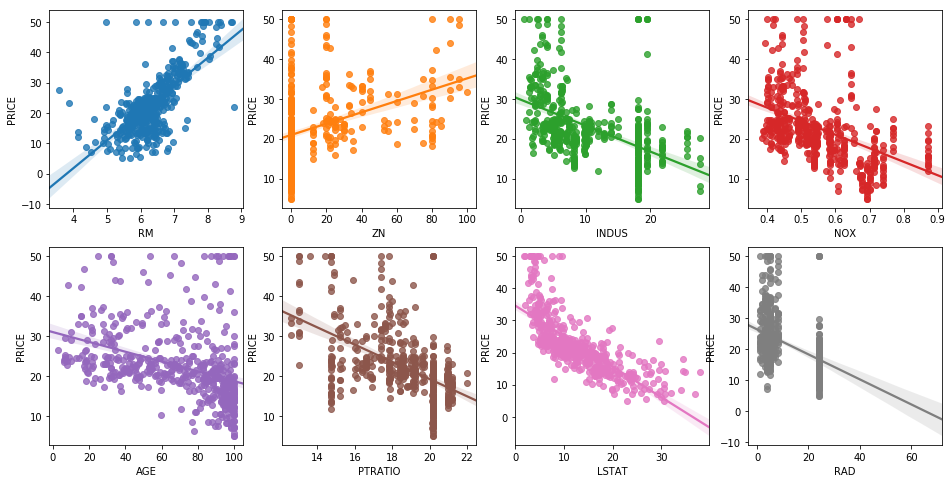

In [4]:
#여러개의 plot을 만들거니까 subplots 적용.
fig, axs = plt.subplots(2,4, figsize=(16,8)) #2x4
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    sns.regplot(feature, 'PRICE', data=df, ax=axs[row][col])

- 본격 머신러닝!(회귀분석)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
X_df = df.drop(['PRICE'], axis=1, inplace=False)
y_df = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=.3, random_state=156)

In [15]:
#객체, 학습, 예측, 평가
lr = LinearRegression() #선형회귀
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

#평가
mse = mean_squared_error(y_test, pred)
print('MSE: {0:.3f}'.format(mse) )
rmse = np.sqrt(mse) #사이킷런에서는 rmse 제공을 안해줘서 직접 구해야됨.
print('RMSE: {0:.3f}'.format(rmse))

vs = r2_score(y_test, pred)
print('Variance Score: {0:.3f}'.format(vs))

MSE: 17.297
RMSE: 4.159
Variance Score: 0.757


In [19]:
#객체.intercept_, 객체.coef_
print('절편 값: ', lr.intercept_) #w0
print('회귀계수값 : ', np.round(lr.coef_,1)) #w1, w2, w3, ...

절편 값:  40.995595172164336
회귀계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [21]:
X_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [22]:
#회귀계수 값만 나오므로 앞에 피처명도 함께 매핑
coeff = pd.Series(data = np.round(lr.coef_,1), index=X_df.columns) #seires로 변환(sort_values를 쓸거기때문)
coeff.sort_values(ascending=False) #내림차순 정렬

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

##### cross_val_score(estimator, X, y, scoring, cv)
- train/test split, 교차검증, 평가까지 한번에!
- 주의: 교차검증 시 학습-평가를 cv 수만큼 수행하므로 최종 평가 결과는 꼭 "평균" 내기

In [23]:
from sklearn.model_selection import cross_val_score

In [25]:
#교차검증. k=5
neg_mse_score = cross_val_score(lr, X_df, y_df, scoring='neg_mean_squared_error', cv=5) #사이킷런에서는 항상 음수값으로 나오게 됨(값이 클수록 안좋은거니까-음수를 붙이면 값이 작은게 좋게 나오므로)
mse_score = -1*neg_mse_score#실제 mse값은 반환된 후 다시 -1을 곱해줌.
rmse_score = np.sqrt(mse_score)
 ##결과는 cv 개수만큼 나오므로 반드시 평균해주자!
avg_mse = np.mean(mse_score)
avg_rmse = np.mean(rmse_score)

print('5 folds의 개별 Negative MSE: ', np.round(neg_mse_score, 2))
print('5 folds의 개별 MSE: ', np.round(mse_score, 2))
print('5 folds의 개별 RMSE: ', np.round(rmse_score, 2))
print('5 folds의 평균 MSE: ', np.round(avg_mse, 2))
print('5 folds의 평균 RMSE: ', np.round(avg_rmse, 2))

5 folds의 개별 Negative MSE:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 MSE:  [12.46 26.05 33.07 80.76 33.31]
5 folds의 개별 RMSE:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 MSE:  37.13
5 folds의 평균 RMSE:  5.83
